In [172]:
import pandas as pd
import scipy.stats as stats
import numpy as np
%matplotlib inline

data = pd.read_excel('body_image.xls')

data.head()

,Gender,Height,GPA,HS GPA,Seat,WtFeel,Cheat
0,Female,64.0,2.6,2.63,M,AboutRt,No
1,Male,69.0,2.7,3.72,M,AboutRt,No
2,Female,66.0,3,3.44,F,AboutRt,No
3,Female,63.0,3.11,2.73,F,AboutRt,No
4,Male,72.0,3.4,2.35,B,OverWt,No


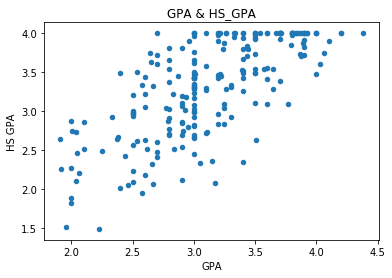

In [173]:
gpa_relationship = data[['GPA', 'HS GPA']][data['GPA'] != '*'].astype(float)
gpa_relationship.plot(kind = 'scatter', x = 'GPA', y = 'HS GPA', title = 'GPA & HS_GPA')

In [174]:
stats.linregress(x = gpa_relationship['GPA'], y = gpa_relationship['HS GPA'])

LinregressResult(slope=0.82684724798357423, intercept=0.72583893048506187, rvalue=0.71554736342228153, pvalue=4.5561961707265307e-37, stderr=0.053695639370292716)

In [175]:
gender_wtfeel = pd.pivot_table(data, 
               index = 'Gender', 
               columns = 'WtFeel', 
               values = 'Cheat', 
               aggfunc = 'count', 
               margins = True)

gender_wtfeel

WtFeel,AboutRt,OverWt,UnderWt,All
Gender,,,,
Female,107.0,32.0,6.0,145.0
Male,56.0,15.0,13.0,84.0
All,163.0,47.0,19.0,229.0


In [176]:
gender_wtfeel['AboutRt_prop'] = gender_wtfeel['AboutRt'] / gender_wtfeel['All'] * 100
gender_wtfeel['OverWt_prop'] = gender_wtfeel['OverWt'] / gender_wtfeel['All'] * 100
gender_wtfeel['UnderWt_prop'] = gender_wtfeel['UnderWt'] / gender_wtfeel['All'] * 100
gender_wtfeel_prop = gender_wtfeel[['AboutRt_prop', 'OverWt_prop', 'UnderWt_prop']]
gender_wtfeel_prop

WtFeel,AboutRt_prop,OverWt_prop,UnderWt_prop
Gender,,,
Female,73.793103,22.068966,4.137931
Male,66.666667,17.857143,15.476190
All,71.179039,20.524017,8.296943


In [184]:
data_float = data[data['GPA'] != '*']
data_float_copy = data_float.copy()
data_float_copy.loc[:, 'GPA'] = data_float.loc[:, 'GPA'].astype(float)
q_1 = pd.pivot_table(data_float_copy, 
               index = 'Seat', 
               values = 'GPA', 
               aggfunc = lambda x: x.quantile(q = 0.25)).rename(columns = {'GPA':'Q1'})
q_2 = pd.pivot_table(data_float_copy, 
               index = 'Seat', 
               values = 'GPA', 
               aggfunc = lambda x: x.quantile(q = 0.5)).rename(columns = {'GPA':'mid'})
q_3 = pd.pivot_table(data_float_copy, 
               index = 'Seat', 
               values = 'GPA', 
               aggfunc = lambda x: x.quantile(q = 0.75)).rename(columns = {'GPA':'Q3'})
others = pd.pivot_table(data_float_copy, 
               index = 'Seat', 
               values = 'GPA', 
               aggfunc = [np.min, np.mean, np.max])

gpa_seat = pd.concat((q_1, q_2, q_3, others), axis = 1)
gpa_seat

,Q1,mid,Q3,"(amin, GPA)","(mean, GPA)","(amax, GPA)"
Seat,,,,,,
B,2.6775,3.00,3.2375,2.00,2.974348,4.06
F,3.0000,3.33,3.7000,1.92,3.251098,4.10
M,2.7800,3.00,3.5050,1.91,3.118931,4.38
